In [94]:
import math

class condEnt:
    def __init__(self, degree, text):
        self.degree = degree
        self.text = text
        self.letters_prob = {}
        self.letters_prob_prev = {}
        self.words_prob = {}
        self.words_prob_prev = {}

    def probabilities(self):
        for i in range(len(self.text) - self.degree):
            p = self.text[i : i+self.degree]
            if p in self.letters_prob.keys():
                self.letters_prob[p] += 1
            else:
                self.letters_prob[p] = 1

            prev = self.text[i : i+self.degree-1]
            if prev in self.letters_prob_prev.keys():
                self.letters_prob_prev[prev] += 1
            else:
                self.letters_prob_prev[prev] = 1

        text = self.text.split(' ')
        for i in range(len(text) - self.degree):
            p = ' '.join(text[i : i+self.degree])
            if p in self.words_prob.keys():
                self.words_prob[p] += 1
            else:
                self.words_prob[p] = 1

            prev = ' '.join(text[i : i+self.degree-1])
            if prev in self.words_prob_prev.keys():
                self.words_prob_prev[prev] += 1
            else:
                self.words_prob_prev[prev] = 1

    def compute(self):
        self.probabilities()
        let_sum = 0
        letters_cnt = sum(self.letters_prob.values())
        for i in self.letters_prob.keys():
            let_sum -= self.letters_prob[i] / letters_cnt * math.log2(self.letters_prob[i] / self.letters_prob_prev[i[:-1]])

        word_sum = 0
        words_cnt = sum(self.words_prob.values())
        for i in self.words_prob.keys():
            word_sum -= self.words_prob[i] / words_cnt * math.log2(self.words_prob[i]/ self.words_prob_prev[' '.join(i.split(' ')[:-1])])

        return (let_sum, word_sum)

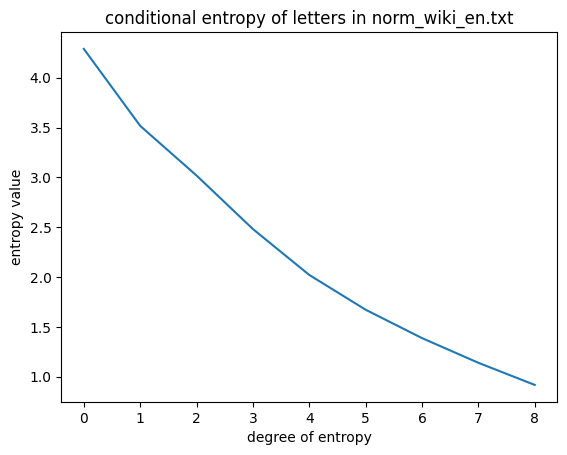

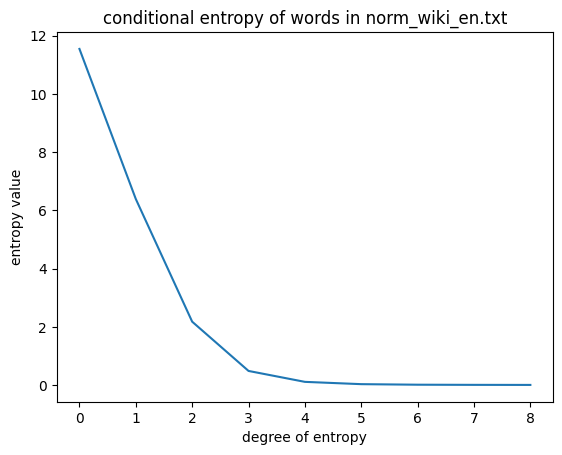

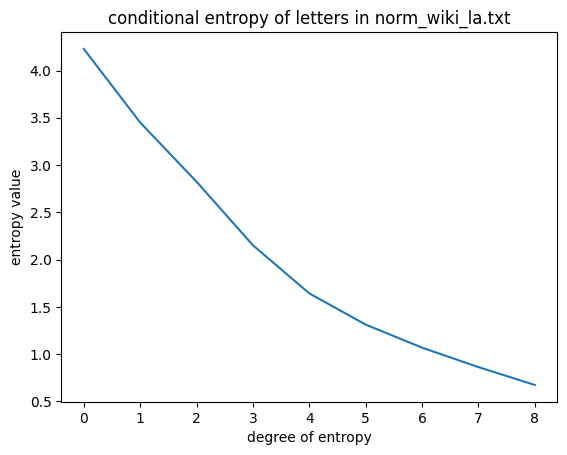

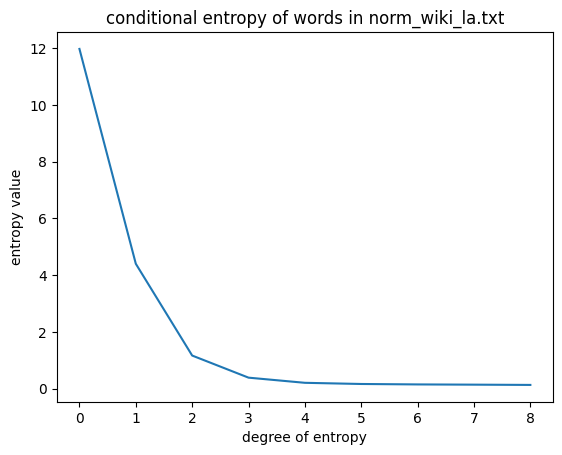

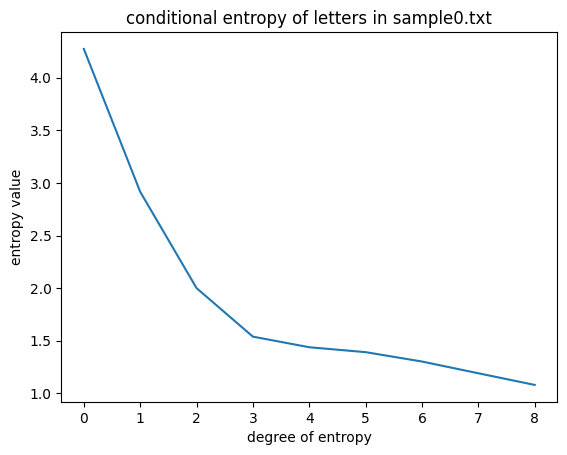

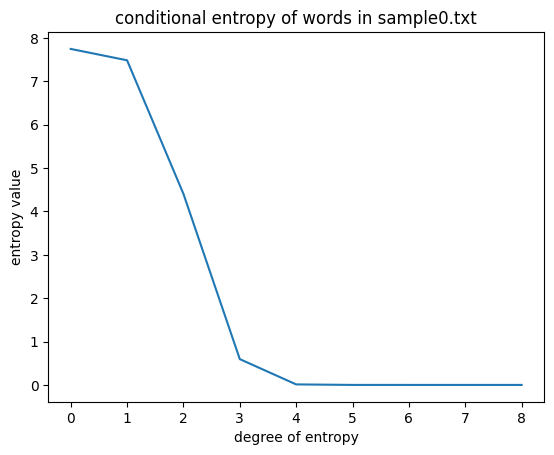

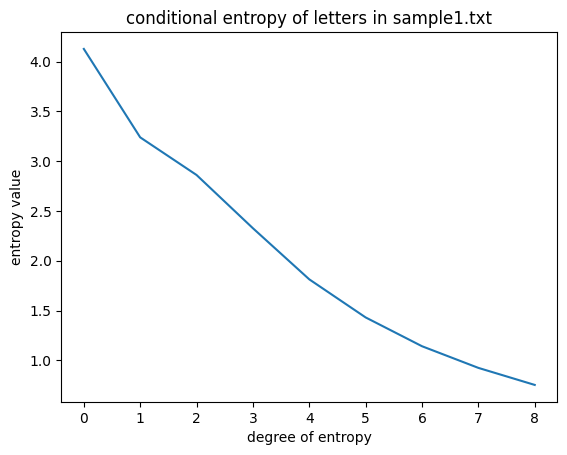

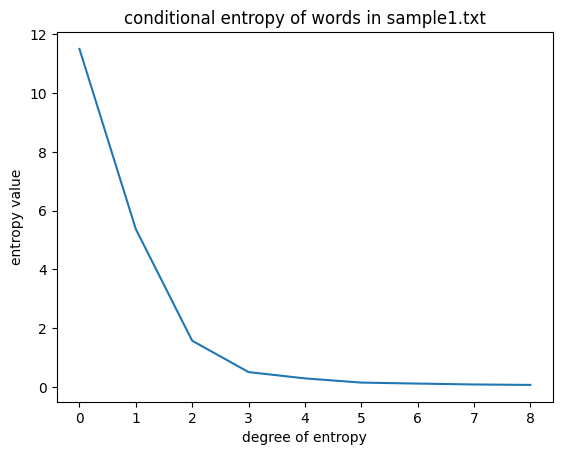

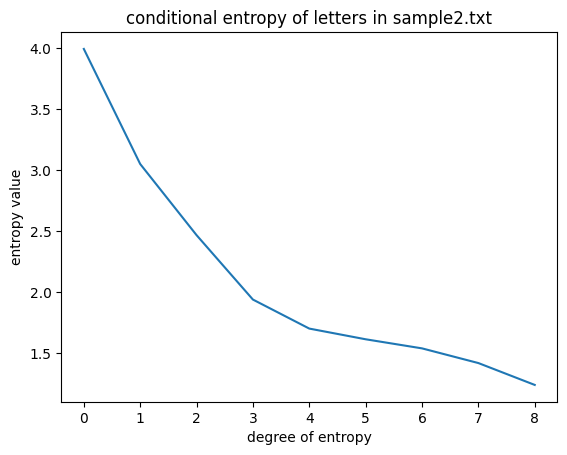

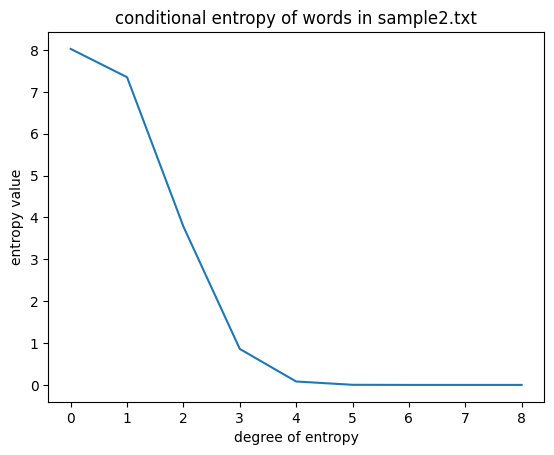

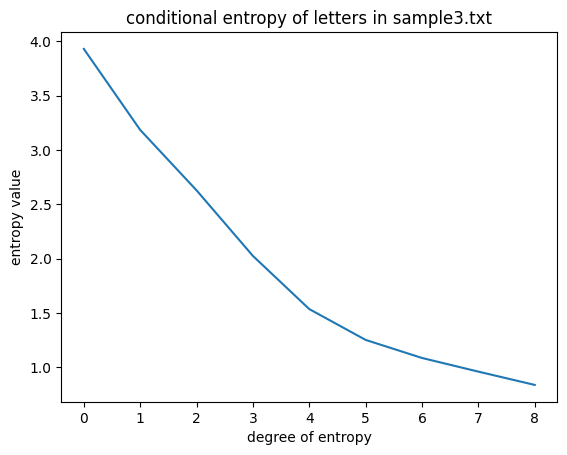

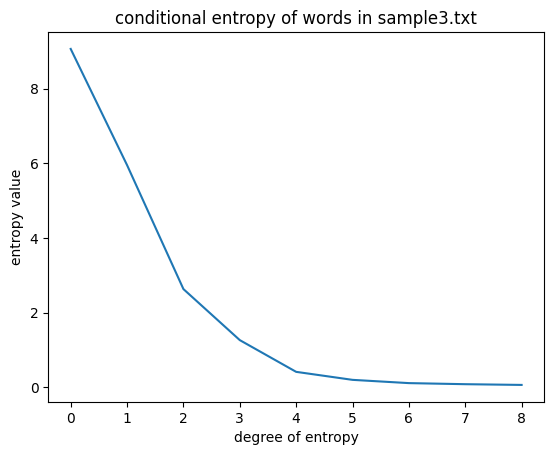

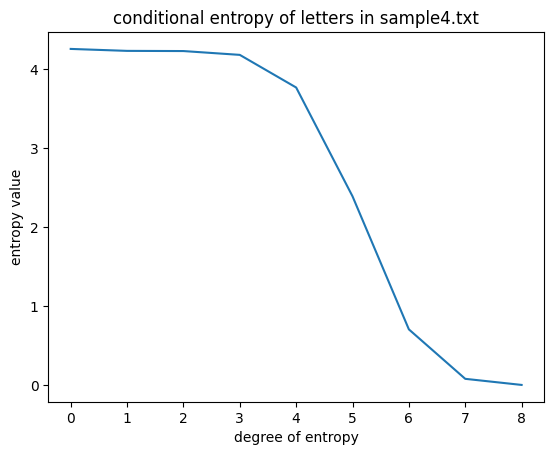

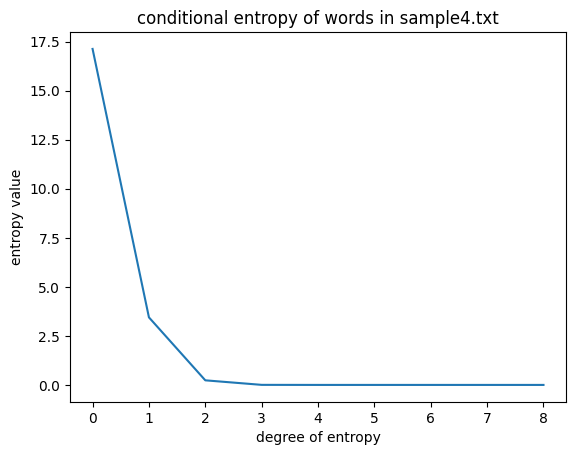

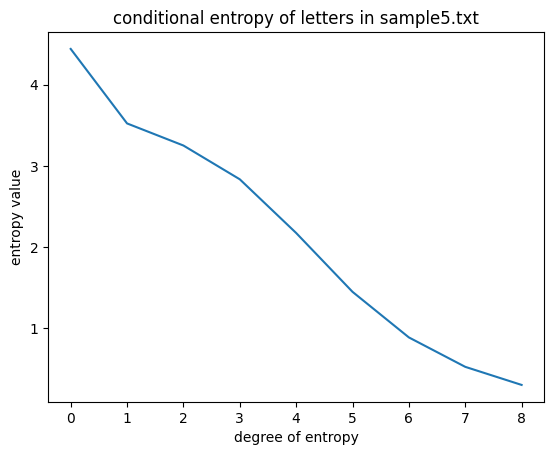

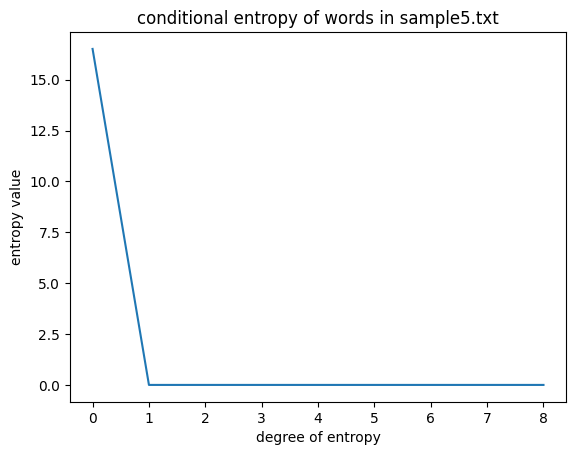

In [96]:
import matplotlib.pyplot as plt
files = ["norm_wiki_en", "norm_wiki_la", "sample0", "sample1", "sample2", "sample3", "sample4", "sample5"]

for file in files:
    f = open(file+".txt", "r")
    text = f.read()
    f.close()

    let_x_axis = []
    let_y_axis = []
    word_x_axis = []
    word_y_axis = []
    for i in range(1, 10):
        let_x_axis.append(i-1)
        word_x_axis.append(i-1)
        entEn = condEnt(i, text)
        ent = entEn.compute()
        let_y_axis.append(ent[0])
        word_y_axis.append(ent[1])
        del entEn

    plt.plot(let_x_axis, let_y_axis)
    plt.title('conditional entropy of letters in '+file+'.txt')
    plt.xlabel('degree of entropy')
    plt.ylabel('entropy value')
    plt.show()

    plt.plot(word_x_axis, word_y_axis)
    plt.title('conditional entropy of words in '+file+'.txt')
    plt.xlabel('degree of entropy')
    plt.ylabel('entropy value')
    plt.show()

## Conclusions

When we compare "letter" graphs and graphs with conditional entropy of words from all sample files to graphs from norm_wiki_en and norm_wiki_la files we can see, that only sample1 and sample3 are really similar to them. In sample0 letter graph is too fast going down, and word graph has weird breakdown on the beginning. Sample2 is very similar to sample0, sample4 is very different from every other graph and in sample5 we can see that word graph hits 0 level very soon and is leveled till the end. So we can conclude that only sample1 and sample3 represents natural language.